In [1]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading the data
data= pd.read_csv("GlobalTemperatures.csv", skiprows=1)

# Replace '***' with NaN
data = data.replace('***', np.nan)
# Convert the data to numeric
data = data.apply(pd.to_numeric)

# Remove rows with null values
data.dropna(inplace=True)
data

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
1,1881,-0.20,-0.14,0.03,0.05,0.06,-0.19,0.00,-0.04,-0.15,-0.22,-0.19,-0.07,-0.09,-0.10,-0.17,0.05,-0.08,-0.19
2,1882,0.16,0.14,0.05,-0.17,-0.15,-0.24,-0.17,-0.08,-0.14,-0.24,-0.16,-0.36,-0.11,-0.09,0.08,-0.09,-0.16,-0.18
3,1883,-0.29,-0.37,-0.12,-0.18,-0.18,-0.08,-0.07,-0.14,-0.21,-0.11,-0.23,-0.11,-0.17,-0.20,-0.34,-0.16,-0.10,-0.19
4,1884,-0.13,-0.07,-0.36,-0.40,-0.34,-0.36,-0.30,-0.28,-0.27,-0.25,-0.34,-0.31,-0.29,-0.27,-0.10,-0.37,-0.32,-0.29
5,1885,-0.59,-0.34,-0.27,-0.42,-0.46,-0.44,-0.34,-0.32,-0.28,-0.24,-0.24,-0.10,-0.34,-0.35,-0.41,-0.38,-0.37,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2019,0.94,0.95,1.18,1.01,0.85,0.90,0.95,0.95,0.93,1.01,1.00,1.10,0.98,0.97,0.94,1.01,0.93,0.98
140,2020,1.17,1.25,1.17,1.13,1.02,0.92,0.90,0.87,0.98,0.88,1.11,0.80,1.02,1.04,1.17,1.11,0.90,0.99
141,2021,0.81,0.65,0.89,0.76,0.79,0.85,0.92,0.82,0.93,1.00,0.94,0.87,0.85,0.85,0.76,0.81,0.86,0.95
142,2022,0.91,0.90,1.05,0.84,0.84,0.93,0.94,0.95,0.89,0.97,0.73,0.81,0.90,0.90,0.89,0.91,0.94,0.86


In [4]:
# Data preprocessing
X = data.drop(columns=['Year', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON']).values
y = data['J-D'].values

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (143, 12)
Shape of y: (143,)


In [5]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_pred = linear_reg.predict(X_test_scaled)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)
rf_reg_pred = rf_reg.predict(X_test_scaled)

In [12]:
# Neural Network
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(X_train_scaled.shape[1], 1)))  # Assuming X_train_scaled has shape (num_samples, num_features)
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dense(1))

# Compile the model
rnn_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))

# Reshape the input data for RNN
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Fit the model
epochs = 100
batch_size = 32
history = rnn_model.fit(X_train_rnn, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Make predictions
rnn_pred = rnn_model.predict(X_test_rnn)




Epoch 1/100
4/4 [==============================] - 1s 9ms/step - loss: 0.1802
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0470
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0168
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0129
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0079
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0075
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0048
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0094
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0053
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0043
Epoch 11/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 12/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0024
Epoch 13/100
4/4 [==============================] - 0s 7ms/st

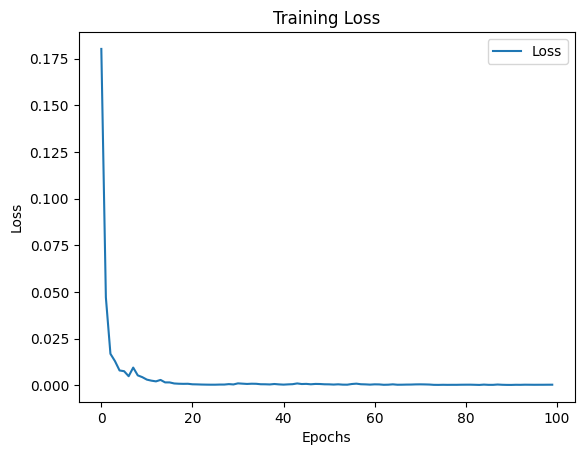

In [13]:
# Plot loss history
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [14]:
# Support Vector Regression (SVR)
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)

# Gradient Boosting Regression
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train_scaled, y_train)
gb_reg_pred = gb_reg.predict(X_test_scaled)

In [15]:
# Evaluate models
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
rf_reg_mse = mean_squared_error(y_test, rf_reg_pred)
rnn_mse = mean_squared_error(y_test, rnn_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
gb_reg_mse = mean_squared_error(y_test, gb_reg_pred)

In [16]:
print("Linear Regression MSE:", linear_reg_mse)
print("Random Forest Regression MSE:", rf_reg_mse)
print("RNN MSE:", rnn_mse)
print("SVR MSE:", svr_mse)
print("Gradient Boosting Regression MSE:", gb_reg_mse)

Linear Regression MSE: 1.2534478212723646e-05
Random Forest Regression MSE: 0.0013798172413793087
RNN MSE: 0.0004137594654409371
SVR MSE: 0.002840265153870605
Gradient Boosting Regression MSE: 0.0018607360500542598


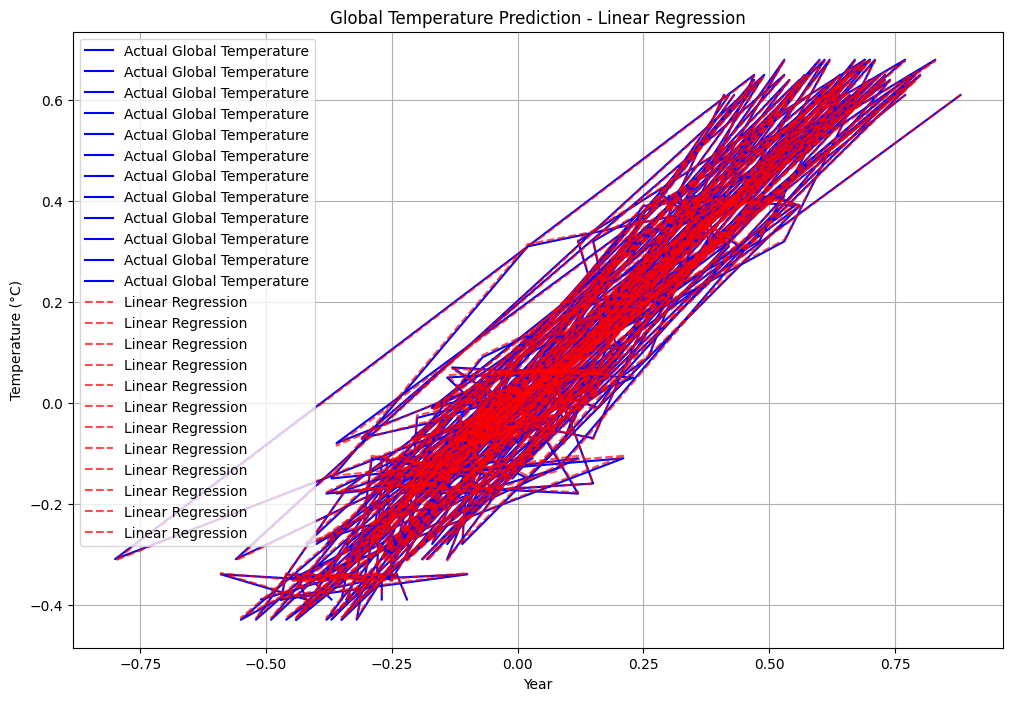

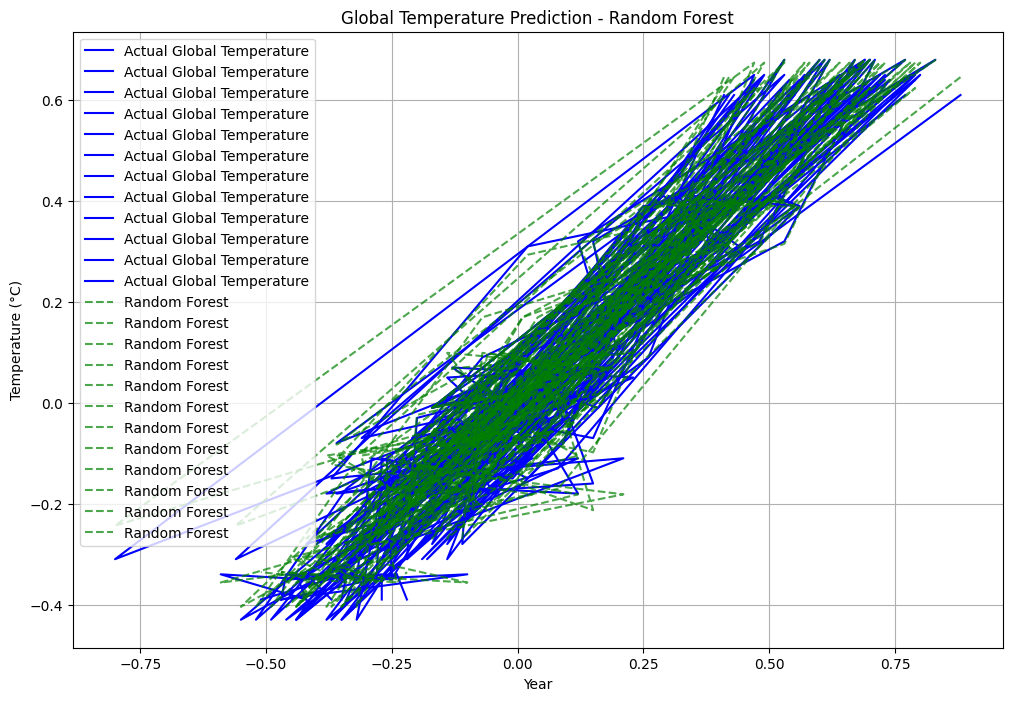

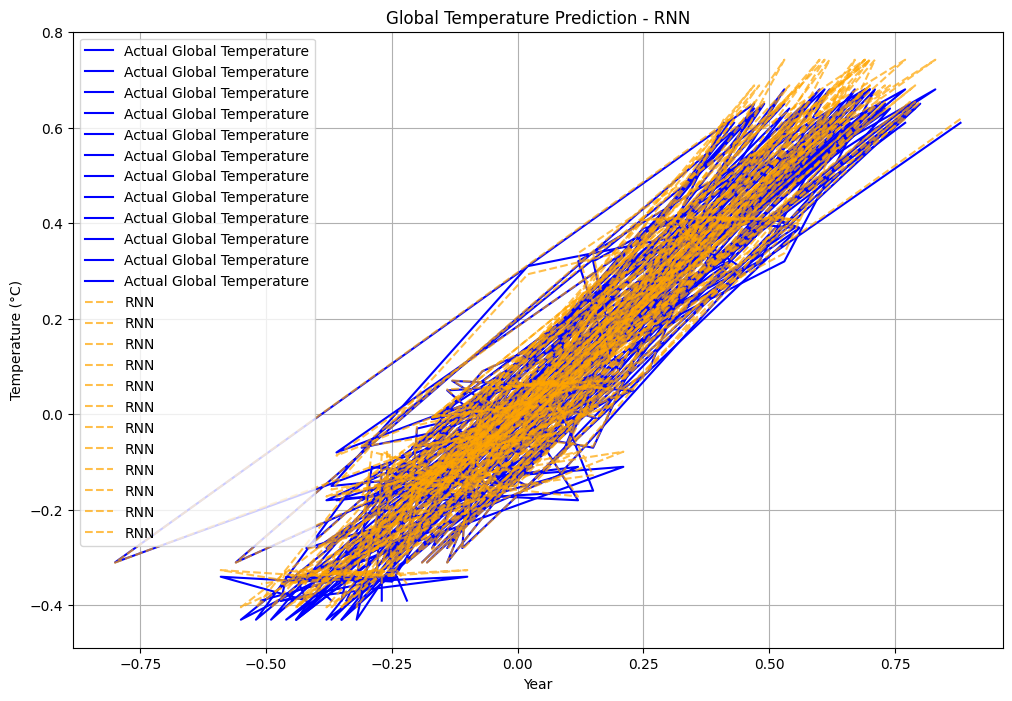

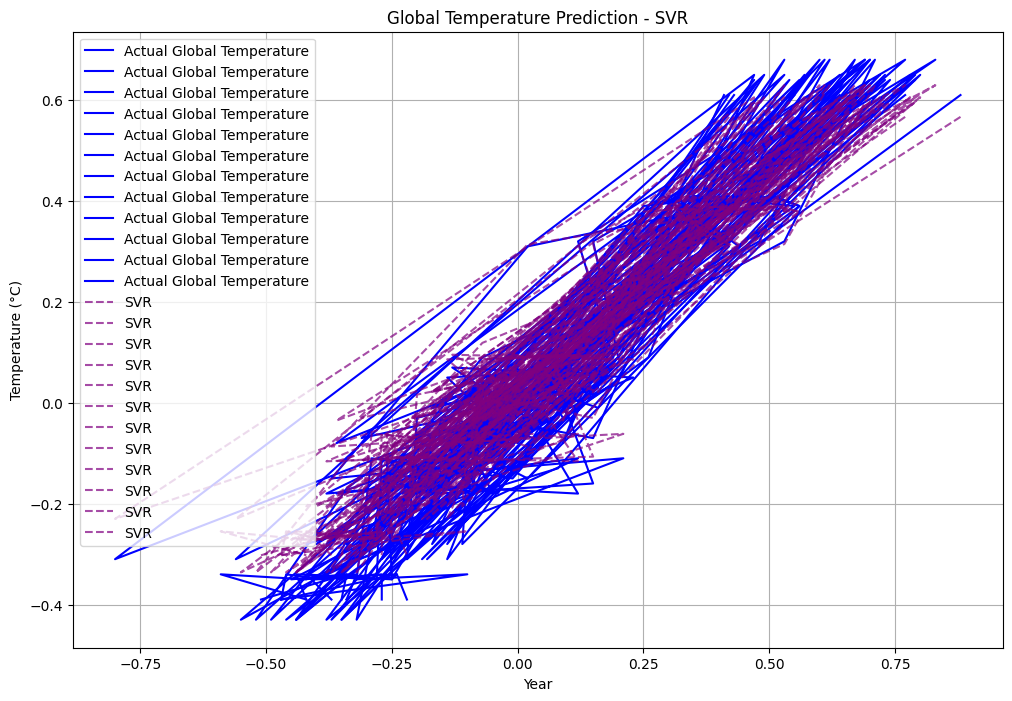

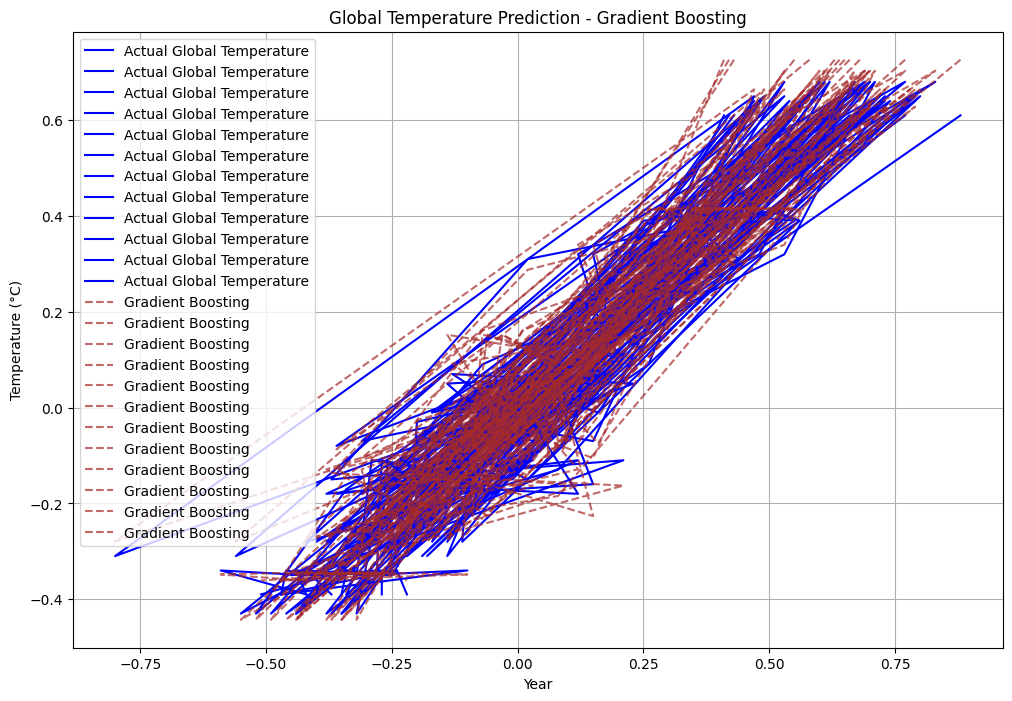

In [21]:
# Visualize predictions for each model separately
plt.figure(figsize=(12, 8))

# Actual Global Temperature
plt.plot(X_test, y_test, label='Actual Global Temperature', color='blue')

# Linear Regression Predictions
plt.plot(X_test, linear_reg_pred, label='Linear Regression', linestyle='--', color='red', alpha=0.7)

plt.title('Global Temperature Prediction - Linear Regression')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Random Forest Predictions
plt.figure(figsize=(12, 8))
plt.plot(X_test, y_test, label='Actual Global Temperature', color='blue')
plt.plot(X_test, rf_reg_pred, label='Random Forest', linestyle='--', color='green', alpha=0.7)
plt.title('Global Temperature Prediction - Random Forest')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# RNN Predictions
plt.figure(figsize=(12, 8))
plt.plot(X_test, y_test, label='Actual Global Temperature', color='blue')
plt.plot(X_test, rnn_pred, label='RNN', linestyle='--', color='orange', alpha=0.7)
plt.title('Global Temperature Prediction - RNN')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# SVR Predictions
plt.figure(figsize=(12, 8))
plt.plot(X_test, y_test, label='Actual Global Temperature', color='blue')
plt.plot(X_test, svr_pred, label='SVR', linestyle='--', color='purple', alpha=0.7)
plt.title('Global Temperature Prediction - SVR')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Gradient Boosting Predictions
plt.figure(figsize=(12, 8))
plt.plot(X_test, y_test, label='Actual Global Temperature', color='blue')
plt.plot(X_test, gb_reg_pred, label='Gradient Boosting', linestyle='--', color='brown', alpha=0.7)
plt.title('Global Temperature Prediction - Gradient Boosting')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


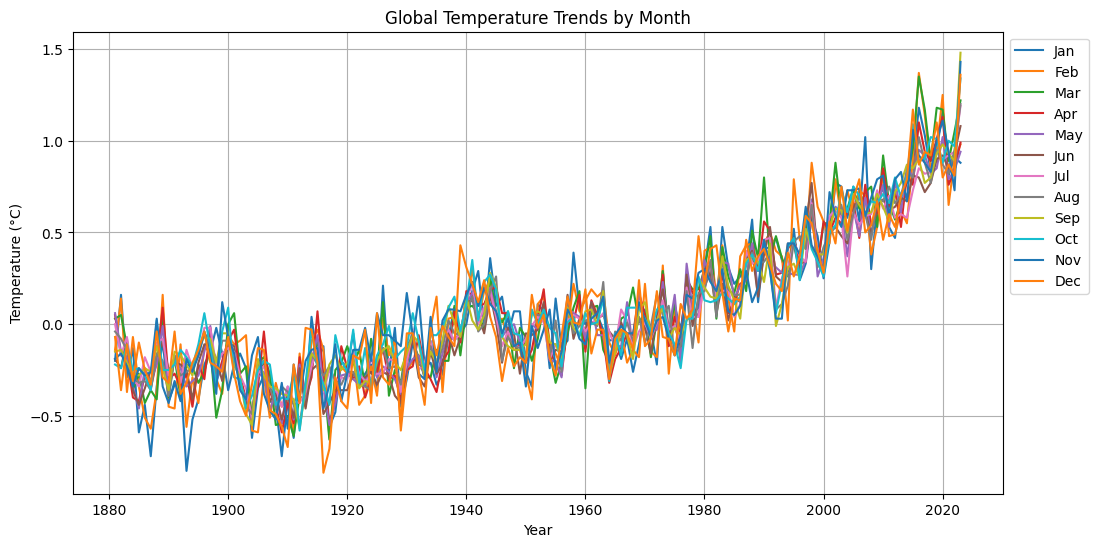

In [30]:
# Plotting temperature trends
plt.figure(figsize=(12, 6))

# Extracting the months
months = data.columns[1:13]

# Plotting the average temperature for each month over the years
for month in months:
    plt.plot(data['Year'], data[month], label=month)

plt.title('Global Temperature Trends by Month')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

**Conclusion:** Based on the analysis and canculations, I conclude that

**1. Climate Patterns:** The overall increase in temperatures can lead to changes in climate patterns. This may result in more frequent and intense heatwaves, changes in precipitation patterns, and alterations in the frequency and severity of extreme weather events such as storms and droughts.

**2. Ecosystems:** Rising temperatures can have significant impacts on ecosystems worldwide. It can disrupt habitats, lead to shifts in species distribution and biodiversity, and affect the timing of seasonal events such as migration and flowering. Some species may struggle to adapt to rapidly changing conditions, leading to population declines and potential extinctions.

**3. Sea Levels:** The warming of the planet contributes to the melting of polar ice caps and glaciers, causing sea levels to rise. This can lead to coastal erosion, loss of habitat for coastal species, increased flooding risk for low-lying coastal areas, and salinization of freshwater sources.

**4. Human Health:** Higher temperatures can pose risks to human health, particularly through heat-related illnesses and exacerbation of existing health conditions. Heatwaves can also increase the risk of heatstroke and heat-related deaths, particularly among vulnerable populations such as the elderly and children.

**5. Economic Impacts**: Climate change, driven by rising temperatures, can have significant economic consequences. This includes damage to infrastructure from extreme weather events, loss of agricultural productivity due to changing growing conditions, and increased healthcare costs associated with heat-related illnesses.

**6. Global Efforts:** Addressing the challenge of rising temperatures requires global cooperation and concerted efforts to mitigate climate change. This includes reducing greenhouse gas emissions, transitioning to renewable energy sources, implementing adaptation measures to protect vulnerable communities, and promoting sustainable land-use practices.
